# 使用 synthetic data (人工数据) 进行线性回归预测

epoch 1, loss 0.25686658599352813
epoch 2, loss 1.0893299429881154e-05
epoch 3, loss 9.73473518024548e-06


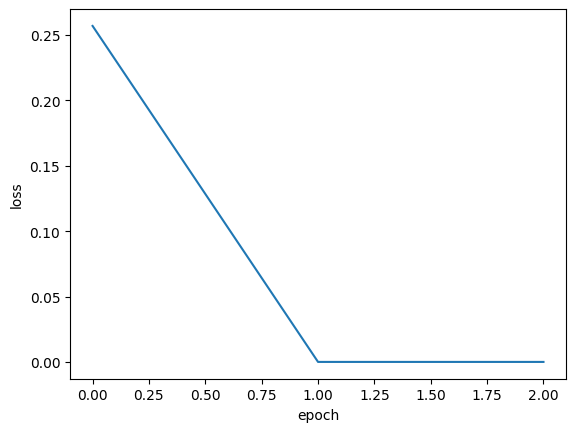

In [9]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from torch import nn
import matplotlib.pyplot as plt

class SyntheticData():
    def __init__(self):
        self.w = torch.tensor([2, -3.4])
        self.b = 4.2
        self.num_samples = 1000
        
        self.X, self.y = self.generate_data()

    def generate_data(self):
        X = torch.normal(0, 1, (self.num_samples, len(self.w)))
        y = torch.matmul(X, self.w) + self.b
        y += torch.normal(0, 0.01, y.shape)
        return X, y.reshape((-1, 1))
    
    def get_dataloder(self, batch_size):
        return DataLoader(TensorDataset(self.X, self.y), batch_size, shuffle=True)
    
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return self.linear(x)
    
def train():
    batch_size = 10
    lr = 0.03
    num_epochs = 3

    model = LinearRegression()
    synthetic_data = SyntheticData()

    loss_function = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    per_loss = []
    for epoch in range(num_epochs):
        losses = []
        for X, y in synthetic_data.get_dataloder(batch_size):
            y_pred = model(X)
            loss = loss_function(y_pred, y)
            losses.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        avg_loss = sum(losses) / len(losses) / batch_size
        per_loss.append(avg_loss)
        print(f'epoch {epoch + 1}, loss {avg_loss}')
    
    plt.plot(per_loss)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

if __name__ == '__main__':
    train()
